In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [33]:
# Generate Synthetic data   
# x1= area , x2 = bedrooms 

np.random.seed(42)
n_samples= 100

# Random sizes between 1000 and 3000 sqft
x1 = np.random.rand(n_samples,1)*2000+1000

# Random bedrooms between 1 to 5 
x2 = np.random.randint(1, 6, size = (n_samples,1))
X = np.hstack((x1, x2))


# True weight , bias and some noise 
true_w = np.array([[300], [15000]])
true_b = 50000
noise = np.random.randn(n_samples, 1)*10000

#actual prices 
y = np.dot( X , true_w) + true_b + noise

# Feature Scaling , normalize data 
# problem is the size is massive and the bedrooms are tiny so we need to normalize the data first using z-score normalization
mean = np.mean(X , axis=0)
std = np.std(X , axis=0)
X_scaled = (X-mean) / std


#Initialisation 
#Weight matrix must match the shape of features and that is the area and bedrooms so the (2, 1)
w = np.zeros((2,1))
b = 0.0
learning_rate = 0.01
epochs = 1000
n = n_samples
loss_history = []


#Gradient descent (vectorized)

for i in range(epochs):

    # forward pass prediction using dot product
    # (100,2) dot (2,1) -> (100,1)
    y_pred = np.dot(X_scaled , w) + b 

    # calculate loss 
    error = y_pred - y 
    loss = np.mean(error**2)
    loss_history.append(loss)


    #backward pass (Gradients)
    dw = (2/n)*np.dot(X_scaled.T , error)
    db = (2/n)*np.sum(error)

    #Update Parameters 
    w = w- learning_rate * dw 
    b = b- learning_rate * db

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss} , w: {w.T}, b: {b}")


Epoch 0, Loss: 487883611465.35333 , w: [[3609.6314357   979.05685748]], b: 13487.44911118422
Epoch 100, Loss: 8660331220.41669 , w: [[153820.44578983  25658.8365783 ]], b: 586726.1795065728
Epoch 200, Loss: 261925262.01792377 , w: [[173705.45243109  22546.20860411]], b: 662748.8453532811
Epoch 300, Loss: 110624536.65599094 , w: [[176616.32106954  21243.84663029]], b: 672830.9375358067
Epoch 400, Loss: 107800650.86100277 , w: [[177079.38845085  20935.03844749]], b: 674168.0201235436
Epoch 500, Loss: 107745130.58319405 , w: [[177157.49021777  20871.73046467]], b: 674345.3434225239
Epoch 600, Loss: 107743954.03854412 , w: [[177171.15292509  20859.4865126 ]], b: 674368.859959684
Epoch 700, Loss: 107743926.59804836 , w: [[177173.59404192  20857.1814574 ]], b: 674371.9787123986
Epoch 800, Loss: 107743925.88865586 , w: [[177174.03532218  20856.75322574]], b: 674372.3923199984
Epoch 900, Loss: 107743925.86856502 , w: [[177174.11559637  20856.67420294]], b: 674372.4471724549


In [ ]:
new_house = np.array([[2000,3]])
new_house_scaled = (new_house - mean) / std
predicted_price = np.dot(new_house_scaled , w) + b
print("Predicted Price:", predicted_price[0][0])

Predicted Price: 693568.2333796528


Epoch 0: Loss 16.2981
Epoch 100: Loss 0.1943
Epoch 200: Loss 0.1943
Epoch 300: Loss 0.1943
Epoch 400: Loss 0.1943
Epoch 500: Loss 0.1943
Epoch 600: Loss 0.1943
Epoch 700: Loss 0.1943
Epoch 800: Loss 0.1943
Epoch 900: Loss 0.1943


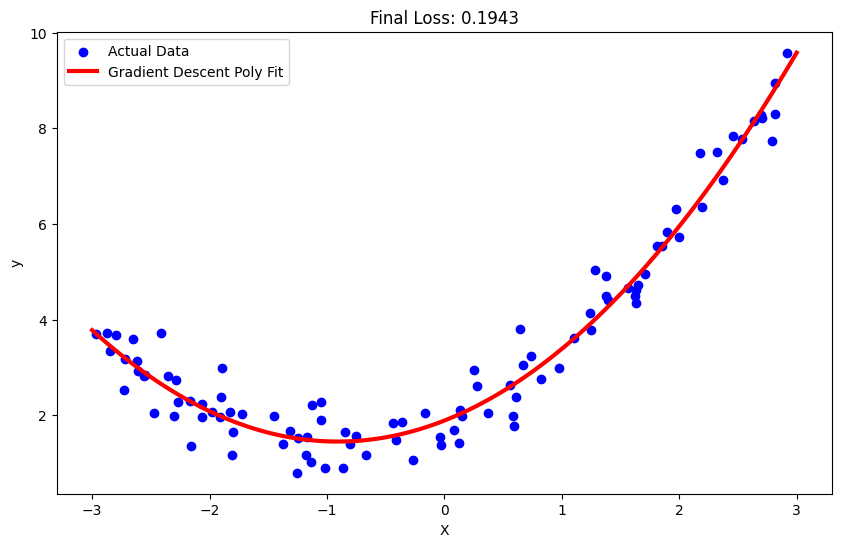

Learned Weights (on scaled data): [1.71708772 1.4214241 ]


In [57]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Generate Non-Linear Data (Parabola)
# y = 0.5x^2 + x + 2
m = 100
X_raw = 6 * np.random.rand(m, 1) - 3  # X values between -3 and 3
y = 0.5 * X_raw**2 + X_raw + 2 + np.random.randn(m, 1) * 0.5 # Added noise

# 2. Feature Engineering: Create x^2
# This is the "Hack". We manually stack x^2 as a second feature.
X_squared = X_raw ** 2
X = np.column_stack((X_raw, X_squared))

# 3. CRITICAL: Feature Scaling
# x ranges [-3, 3]. x^2 ranges [0, 9].
# Without scaling, the gradients for x^2 would be much larger than for x.
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_scaled = (X - mean) / std

# 4. Initialization
# We have 2 features (x and x^2), so we need a (2,1) weight vector
W = np.zeros((2, 1))
b = 0
learning_rate = 0.1
epochs = 1000
n = m

# 5. Gradient Descent Loop (Standard)
loss_history = []
for i in range(epochs):
    # Forward Pass
    y_pred = np.dot(X_scaled, W) + b

    # Loss
    error = y_pred - y
    loss = np.mean(error**2)
    loss_history.append(loss)

    # Backward Pass
    dw = (2/n) * np.dot(X_scaled.T, error)
    db = (2/n) * np.sum(error)

    # Update
    W -= learning_rate * dw
    b -= learning_rate * db

    if i % 100 == 0:
        print(f"Epoch {i}: Loss {loss:.4f}")

# 6. Visualization
# To plot the curve, we must transform the plot points EXACTLY like we transformed the training data
X_plot = np.linspace(-3, 3, 100).reshape(100, 1) # Raw x
X_plot_squared = X_plot ** 2                     # Raw x^2
X_plot_stacked = np.column_stack((X_plot, X_plot_squared)) # Stacked
X_plot_scaled = (X_plot_stacked - mean) / std    # Scaled (using TRAINING mean/std)

y_plot_pred = np.dot(X_plot_scaled, W) + b # Predict

plt.figure(figsize=(10, 6))
plt.scatter(X_raw, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot_pred, color='red', linewidth=3, label='Gradient Descent Poly Fit')
plt.title(f"Final Loss: {loss:.4f}")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Learned Weights (on scaled data): {W.flatten()}")